# 1. Data Acquisition
1.1 import Basic Libraries

1.2 Load the datasets

In [1]:
# import Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import Word
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud


import warnings
warnings.filterwarnings("ignore")

In [2]:
reviews=pd.read_excel('hotel_reviews.xlsx')

# 2. Exploratory Data Analysis (EDA)
2.1 Data Exploration

2.2 Checking duplicates & null values

2.3 Removing Unwanted features

After examining "@", we came to the conclusion that this columns is not useful in our Modelling. We will drop those column.
2.4 Checking the data with different aspects before preprocessing it.

In [3]:
reviews = pd.read_excel("hotel_reviews.xlsx")
reviews.drop(columns={'@'},inplace=True)
print("the shape of this dataset is :",reviews.shape)
reviews.sample(5)

the shape of this dataset is : (20491, 2)


Review  Rating
3982   loved loved, skeptical got great, staff friend...       4
17740  coulda great n't nice comfy beachfront hotel v...       4
8363   loved, stayed america week july ca n't believe...       4
5214   highly recommended stayed terrass dec 29th til...       5
7313   great property great stay just returned stay p...       5

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
reviews.duplicated().sum()

0

In [6]:
reviews.nunique()

Review    20491
Rating        5
dtype: int64

In [7]:
reviews.isna().sum()

Review    0
Rating    0
dtype: int64

In [8]:
reviews["Rating"].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

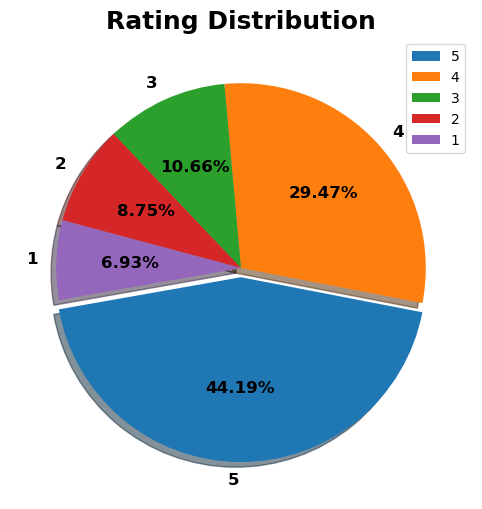

In [9]:
#plotting the ratings
plt.figure(figsize = (10,6))
plt.pie(reviews['Rating'].value_counts(),
       labels=reviews['Rating'].value_counts().index,
       explode = [0.05, 0, 0, 0, 0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large','fontweight':'bold',
                    'rotation':'horizontal','color':'black'})
plt.legend(loc= 'upper right')
plt.title("Rating Distribution", fontsize = 18, fontweight = 'bold')
plt.show()

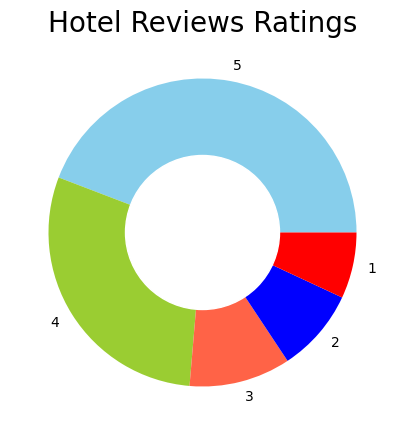

In [10]:
ratings = reviews["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Hotel Reviews Ratings", fontsize=20)
plt.show()

> The data contains more number of 5,4 Ratings compared to 2 and 1

In [11]:
import plotly.express as px
reviews['text_length'] = reviews.Review.str.len()

fig = px.histogram(reviews,
                   x='text_length',
                   color='Rating',
                   color_discrete_sequence=["#B6E880", "#FFA15A", "#FECB52", "#00CC96", "#EF553B"],
                   title="Review Length Distributions"
                  )

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    margin=dict(l=0,r=0,b=0)
)

fig.show()

In [12]:
# to check how many no. of words and no .of characters are there
reviews["word_count"] = reviews["Review"].apply(lambda x: len(str(x).split(" ")))
reviews[["Review","word_count"]].sample(5)

Review  word_count
12420  nice middle class hotel exceeded expectations ...          62
3689   great customer service all-inclusive quite ple...         118
14397  sparkle ritz carlton chandeliers potzdamer pla...          18
1056   unique fun change pace, stayed white swann 3 n...          64
12306  good location hotel good location not far circ...          76

Pearson Correlation Coefficient: -0.09067472401967698
P-value: 1.1340532676013668e-38


Text(0, 0.5, 'Rating')

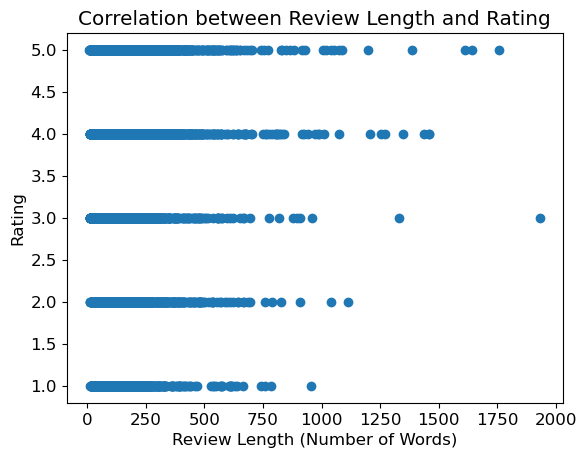

In [13]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(reviews['word_count'], reviews['Rating'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

plt.scatter(reviews['word_count'], reviews['Rating'])
plt.title("Correlation between Review Length and Rating")
plt.xlabel("Review Length (Number of Words)")
plt.ylabel("Rating")

>The correlation coefficient is relatively small (-0.0901), which means that the relationship between review length and rating is not very strong. This means that there is a lot of variation in the data, and that many longer reviews still have low ratings, and many shorter reviews still have high ratings.

In [14]:
# # check no of upper case words
# reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
# reviews[['Review','upper']].head()

In [15]:
# average word per sentences
def avg_word(sentences):
    words = str(sentences).split()
    return (sum(len(word) for word in words)/ len(words))

reviews["avg_words"] = reviews["Review"].apply(lambda x: avg_word(x))
reviews[["Review","avg_words"]].head()

Review  avg_words
0  nice hotel expensive parking got good deal sta...   5.804598
1  ok nothing special charge diamond member hilto...   5.752000
2  nice rooms not 4* experience hotel monaco seat...   5.571429
3  unique, great stay, wonderful time hotel monac...   5.730337
4  great stay great stay, went seahawk game aweso...   5.701571

In [134]:
# # find the special characters using regular exp. module
# import re

# def spl_char(sentences):
#   spl_char_letter = re.compile(r'[^a-zA-Z\s]')
#   words = spl_char_letter.findall(sentences)
#   return len(words)

# reviews['spl_char'] = reviews['Review'].apply(lambda x: spl_char(x))
# reviews[['Review','spl_char']].head()

In [17]:
d1=reviews.copy()

# Ensuring 'Review' column is in string format
d1['Review'] = d1['Review'].astype(str)

# Filter rows that contain ".com"
pattern_matches = d1[d1['Review'].str.contains(r'\b\w+\.com\b')]

# Print the result
print(pattern_matches['Review'])

204      posh hotel husband stayed hilton seattle septe...
336      airport quality westin downtown price stayed w...
394      great atmosphere stay w seattle football games...
498      great airport hotel prepaid rate hilton.com 84...
506      nice hotel minor issues travelling friend stay...
                               ...                        
20098    sick breezes stayed breezes resort punta cana ...
20111    concerns not warranted breezes 25 years old ju...
20234    nice place heart entertainment disctrict just ...
20323    terrible service called hotel change reservati...
20431    perfect birthday getaway boyfriend surprised b...
Name: Review, Length: 293, dtype: object


In [18]:
# Assuming pattern_matches is the DataFrame with rows containing ".com"
all_names = []

for index, row in pattern_matches.iterrows():
    review_text = row['Review']
    words_with_com = re.findall(r'\b\w+\.com\b', review_text)
    if words_with_com:
        all_names.extend(words_with_com)

# List of email service names to be excluded
email_services = [
    'yahoo.com', 'gmail.com', 'aol.com', 'hotmail.com', 'msn.com', 'mac.com', 'rr.com', 'netcom.com', 'excite.com',
    'rogers.com', 'canada.com', 'wmconnect.com', 'ntlworld.com', 'milwpc.com', 'weather.com']

# Filter out email service names from all_names
filtered_names = [name for name in all_names if name not in email_services]

filtered = list(filtered_names)
filtered

['hotwire.com',
 'priceline.com',
 'sneakysunday.com',
 'hilton.com',
 'hiexpress.com',
 'bookit.com',
 'minute.com',
 'hotel.com',
 'hotel.com',
 'fairmont.com',
 'bookit.com',
 'flickr.com',
 'hotels.com',
 'venere.com',
 'hotels.com',
 'tripadvisor.com',
 'tripadvisor.com',
 'otel.com',
 'hotwire.com',
 'tripadvisor.com',
 'tripadvisor.com',
 'tripadvisor.com',
 'hotels.com',
 'hotels.com',
 'advisor.com',
 'hotels.com',
 'hotels.com',
 'travelocity.com',
 'hotels.com',
 'veryveggie.com',
 'priceline.com',
 'cheapcaribbean.com',
 'clusters.com',
 'selloffvacations.com',
 'solmelia.com',
 'tripadvisor.com',
 'solmelia.com',
 'vacationkids.com',
 'priceline.com',
 'hotels.com',
 'intecontinental.com',
 'acampapr.com',
 'baravorunners.com',
 'cheepoair.com',
 'hotelmilanopr.com',
 'tripadvisor.com',
 'booking.com',
 'expedia.com',
 'hotels.com',
 '1800hotels.com',
 'hrs.com',
 'hotelsclick.com',
 'roomsnet.com',
 'otel.com',
 'hotel.com',
 'hotelsrus.com',
 'hotels.com',
 'tripadvisor.

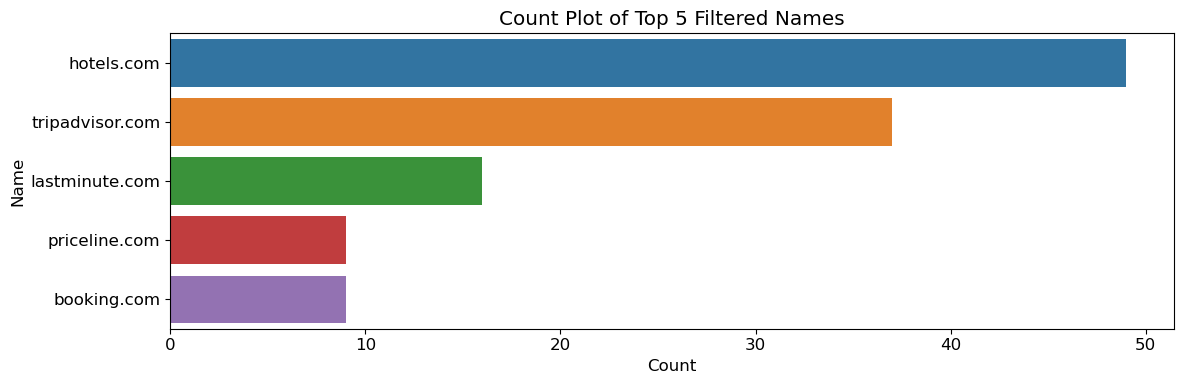

In [133]:
name_counts = pd.Series(filtered).value_counts()

top_5_names = name_counts.head(5).index

# Filter only the top 5 names
filtered_names_top_5 = [name for name in filtered_names if name in top_5_names]

plt.figure(figsize=(12, 4))
sns.countplot(y=filtered_names_top_5, order=pd.Series(filtered_names_top_5).value_counts().index)

plt.title('Count Plot of Top 5 Filtered Names')
plt.xlabel('Count')
plt.ylabel('Name')
plt.tight_layout()
plt.show()

>These are the top 5 domains associated with the websites that provide hotel booking services.

In [135]:
# # find the punctuations using string modules
# import re
# import string

# def count_punct(sentence):
#   punct_chars = string.punctuation
#   punct_letter = re.compile(f'[{re.escape(punct_chars)}]')
#   punctuations = punct_letter.findall(sentence)
#   return len(punctuations)

# reviews['punctuations'] = reviews['Review'].apply(lambda x: count_punct(x))
# reviews[['Review','punctuations']].head()

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
stop.discard('not')  # Remove 'not' from the stopwords set
stop.update(['hotel', 'room'])  # Add 'hotel' and 'room' to the stopwords set

reviews['Review'] = reviews['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))


[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [22]:
# no. of links attached to the review
reviews["Review"].str.contains('https://').value_counts()

False    20491
Name: Review, dtype: int64

In [23]:

reviews["Review"].str.contains("www.").value_counts()

False    20459
True        32
Name: Review, dtype: int64

In [24]:
reviews["Review"].str.contains(".com").value_counts()

True     14234
False     6257
Name: Review, dtype: int64

In [25]:
reviews["Review"].str.contains("it__Ç_é_").value_counts()

False    20303
True       188
Name: Review, dtype: int64

In [26]:
reviews["Review"].str.contains("__Ç_éÈe").value_counts()    # review index 1045

False    20404
True        87
Name: Review, dtype: int64

In [27]:
# no. of usertags
reviews["Review"].str.contains('@').value_counts()

False    20491
Name: Review, dtype: int64

In [28]:
# no. of hashtags
reviews["Review"].str.contains('#').value_counts()

False    20491
Name: Review, dtype: int64

In [136]:
reviews.head()

Review  Rating
0  nice expensive parking got good deal stay anni...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience monaco seattle go...       3
3  unique, great stay, wonderful time monaco, loc...       5
4  great stay great stay, went seahawk game aweso...       5

In [30]:
# Spelling correction
import spacy
nlp = spacy.load('en_core_web_sm')

reviews['Review'][:5].apply(lambda x: str(nlp(x)))

0    nice expensive parking got good deal stay anni...
1    ok nothing special charge diamond member hilto...
2    nice rooms not 4* experience monaco seattle go...
3    unique, great stay, wonderful time monaco, loc...
4    great stay great stay, went seahawk game aweso...
Name: Review, dtype: object

In [31]:
reviews.head()

Review  Rating  text_length  \
0  nice expensive parking got good deal stay anni...       4          593   
1  ok nothing special charge diamond member hilto...       2         1689   
2  nice rooms not 4* experience monaco seattle go...       3         1427   
3  unique, great stay, wonderful time monaco, loc...       5          600   
4  great stay great stay, went seahawk game aweso...       5         1281   

   word_count  avg_words  spl_char  punctuations  
0          89   5.804598        14            12  
1         252   5.752000        39            26  
2         219   5.571429        56            32  
3          91   5.730337        17            16  
4         193   5.701571        42            40

In [33]:
reviews.drop(["text_length","word_count","avg_words","spl_char","punctuations"], inplace=True, axis=1)

# 3. Text-PreProcessing
3.1 Cleaning data

There are a number of special characters and other values that needs to be removed. We will define a clean text function to remove it.
This function will convert all text to lower case
3.2 Removing Emojis

certain useless emojis will be added to data which should be removed custom emojis list.
3.3 Chat words abbrevation replacements

Short forms like IDK, WTF, FYI etc will be replaced with their abbrevations.
3.4 Tokenization

To breaks text into smaller parts for easier to remove stopwords, doing Stemming & Lemmatization.
3.6 Spell Checker

to check every spelling and correct it if it is wrong
3.7 StopWords

to eliminate words that are so widely used that they carry very little useful information.
3.8 Stemming

reducing a word to its word stem that suffixes or the roots
3.9 Lemmatization

lemmatization is to reduce a word to its root form

In [34]:
# Data Pre-Processing
df = reviews[["Review"]]
df.head()

Review
0  nice expensive parking got good deal stay anni...
1  ok nothing special charge diamond member hilto...
2  nice rooms not 4* experience monaco seattle go...
3  unique, great stay, wonderful time monaco, loc...
4  great stay great stay, went seahawk game aweso...

In [35]:
# convert to lower case and removing punctuations,lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers.
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    #text = re.sub('[^a-z]', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://*', '', text)
    text = re.sub("\www.*", "", text)
    text = re.sub("\.com*", "", text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [36]:
df["Clean_Reviews"] = df["Review"].apply(lambda x: clean_text(x))
df.head()

Review  \
0  nice expensive parking got good deal stay anni...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience monaco seattle go...   
3  unique, great stay, wonderful time monaco, loc...   
4  great stay great stay, went seahawk game aweso...   

                                       Clean_Reviews  
0  nice expensive parking got good deal stay anni...  
1  ok nothing special charge diamond member hilto...  
2  nice rooms not  experience monaco seattle good...  
3  unique great stay wonderful time monaco locati...  
4  great stay great stay went seahawk game awesom...

In [37]:
# # Removing emojis
# def remove_emoji(text):
#     emoji_pattern = re.compile("["
#                            u"\U0001F600-\U0001F64F"  # emoticons
#                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            u"\U00002702-\U000027B0"
#                            u"\U000024C2-\U0001F251"
#                            "]+", flags=re.UNICODE)
#     return emoji_pattern.sub(r'', text)

In [42]:
# df["Clean_Reviews"] = df["Clean_Reviews"].apply(lambda x: remove_emoji(x))
# df.head()

In [43]:
# Handling Chat word
'''
IDK = I Dont Know
ASAP = as soon as possible
FYI = For Your Information
FIMH = Forever in my heart
'''
chat_words = {  "AFAIK": "As Far As I Know", "AFK": "Away From Keyboard",
                "ASAP": "As Soon As Possible", "ATK":"At The Keyboard",
                "ATM": "At The Moment", "A3": "Anytime, Anywhere, Anyplace",
                "BAK": "Back At Keyboard" ,"BBL": "Be Back Later",
                "BBS":"Be Back Soon", "BFN":"Bye For Now",
                "B4N":"Bye For Now", "BRB":"Be Right Back",
                "BRT":"Be Right There", "BTW":"By The Way",
                "B4":"Before", "B4N":"Bye For Now",
                "CU":"See You", "CUL8R":"See You Later",
                "CYA":"See You", "FAQ":"Frequently Asked Questions",
                "FC":"Fingers Crossed", "FWIW":"For What It's Worth",
                "FYI":"For Your Information", "GAL":"Get A Life",
                "GG":"Good Game", "GN":"Good Night",
                "GMTA":"Great Minds Think Alike", "GR8":"Great",
                "G9":"Genius", "IC":"I See",
                "ICQ":"I Seek you", "ILU": "I Love You",
                "IMHO":"In My Honest Humble Opinion", "IMO":"In My Opinion",
                "IOW":"In Other Words" ,"IRL":"In Real Life",
                "KISS":"Keep It Simple Stupid", "LDR":"Long Distance Relationship",
                "LMAO":"Laugh My Ass Off", "LOL":"Laughing Out Loud",
                "LTNS":"Long Time No See", "L8R":"Later",
                "MTE":"My Thoughts Exactly", "M8":"Mate",
                "NRN":"No Reply Necessary",  "OIC":"Oh I See",
                "PITA":"Pain In The Ass", "PRT":"Party",
                "PRW":"Parents Are Watching", "ROFL":"Rolling On The Floor Laughing",
                "ROFLOL":"Rolling On The Floor Laughing Out Loud", "ROTFLMAO":"Rolling On The Floor Laughing My Ass Off",
                "SK8":"Skate", 'STATS':'Your sex and age',
                "ASL":"Age Sex Location",  "THNX":"Thank You",
                "TTFN":"TaTa For Now", "TTYL":"Talk To You Later",
                "U":"You", "U2":"You Too",
                "U4E":"Yours For Ever", "WB":"Welcome Back",
                "WTF":"What The Fuck", "WTG":"Way To Go",
                "WUF":"Where Are You From",  "W8":"Wait",
                "7K":"Sick Laughter",  "TFW" : "That feeling when",
                "MFW" : "My face when", "MRW" : "My reaction when",
                "IFYP" : "I feel your pain", "LOL" : "Laughing out loud",
                "TNTL" : "Trying not to laugh", "JK" : "Just kidding",
                "IDC" : "I dont care", "ILY" : "I love you",
                "IMU" : "I miss you", "ADIH" : "Another day in hell",
                "IDC" : "I dont care" ,"ZZZ" : "Sleeping bored tired",
                "WYWH" : "Wish you were here", "TIME" : "Tears in my eyes",
                "BAE" : "Before anyone else", "FIMH" : "Forever in my heart",
                "BSAAW" : "Big smile and a wink", "BWL" : "Bursting with laughter",
                "LMAO" : "Laughing my ass off", "BFF": "Best friends forever",
                "CSL" : "Cant stop laughing"}


chat_words_dict = pd.DataFrame.from_dict(chat_words, orient="index",columns=['full_form'])
chat_words_dict['short_form'] = chat_words_dict.index
chat_words = chat_words_dict.reset_index()
chat_words.drop(["index"], inplace=True, axis=1)

In [44]:
chat_words.head()

full_form short_form
0     As Far As I Know      AFAIK
1   Away From Keyboard        AFK
2  As Soon As Possible       ASAP
3      At The Keyboard        ATK
4        At The Moment        ATM

In [45]:
def chat_conversion(text):
  new_text=[]
  for words in text.split():
    if words.upper() in chat_words['short_form']:
      new_text.append(chat_words[words["full_form"]])
    else:
      new_text.append(words)
  return " ".join(new_text)

In [46]:
df["Clean_Reviews"] = df["Clean_Reviews"].apply(lambda x: chat_conversion(x))
df.head()

Review  \
0  nice expensive parking got good deal stay anni...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience monaco seattle go...   
3  unique, great stay, wonderful time monaco, loc...   
4  great stay great stay, went seahawk game aweso...   

                                       Clean_Reviews  
0  nice expensive parking got good deal stay anni...  
1  ok nothing special charge diamond member hilto...  
2  nice rooms not experience monaco seattle good ...  
3  unique great stay wonderful time monaco locati...  
4  great stay great stay went seahawk game awesom...

In [47]:
review = [text.strip() for text in df.Clean_Reviews] # remove both the leading and the trailing characters
review = [text for text in review if text] # removes empty strings, because they are considered in Python as False
review[:2]

['nice expensive parking got good deal stay anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed nonexistent view clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night',
 'ok nothing special charge diamond member hilton decided chain shot anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting bathroom bedroom unlike kimpton calls suite day stay offer correct false advertising send kimpton prefer

In [48]:
# Joining the list into one string/text
review_text = ' '.join(review)
print(len(review_text))
print(review_text[0:150])

13645336
nice expensive parking got good deal stay anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappoi


In [49]:
# Tokenization
nltk.download('punkt')
import nltk

from nltk.tokenize import word_tokenize
review_tokens = word_tokenize(review_text)
print(review_tokens[0:50])

# for Clean_Reviews Column
df['Clean_Reviews'] = df['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
df.head(5)

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


['nice', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'anniversary', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'reviews', 'valet', 'parking', 'check', 'quick', 'easy', 'little', 'disappointed', 'nonexistent', 'view', 'clean', 'nice', 'size', 'bed', 'comfortable', 'woke', 'stiff', 'neck', 'high', 'pillows', 'not', 'soundproof', 'like', 'heard', 'music', 'night', 'morning', 'loud', 'bangs', 'doors', 'opening', 'closing', 'hear', 'people', 'talking', 'hallway']


Review  \
0  nice expensive parking got good deal stay anni...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience monaco seattle go...   
3  unique, great stay, wonderful time monaco, loc...   
4  great stay great stay, went seahawk game aweso...   

                                       Clean_Reviews  
0  [nice, expensive, parking, got, good, deal, st...  
1  [ok, nothing, special, charge, diamond, member...  
2  [nice, rooms, not, experience, monaco, seattle...  
3  [unique, great, stay, wonderful, time, monaco,...  
4  [great, stay, great, stay, went, seahawk, game...

In [50]:
nltk.download('stopwords')

from nltk.corpus import stopwords

# For wordCloud
my_stop_words = stopwords.words('english')
sw_list = ['\x92','rt','ye','yeah','haha','Yes','__Ç_éÈe','I','__Ç','__Ç_é_',"br/", "hotel", "room"]     # index 1044 emojis
my_stop_words.extend(sw_list)

no_stop_tokens = [word for word in review_tokens if not word in my_stop_words]

# For Clean_Reviews Column
my_stop_words=stopwords.words('english')
my_stop_words.remove('not') 
sw_list = ['\x92','rt','ye','yeah','haha','Yes','__Ç_éÈe','I','__Ç','__Ç_é_',"br/"]     # index 1044 emojis
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in df.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(words_without_stopwords)

df['Clean_Reviews'] = cleaned_tweets
df.head(10)

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


Review  \
0  nice expensive parking got good deal stay anni...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience monaco seattle go...   
3  unique, great stay, wonderful time monaco, loc...   
4  great stay great stay, went seahawk game aweso...   
5  love monaco staff husband stayed crazy weekend...   
6  cozy stay rainy city, husband spent 7 nights m...   
7  excellent staff, housekeeping quality chocked ...   
8  stayed monaco cruise, rooms generous decorated...   
9  excellent stayed monaco past w/e delight, rece...   

                                       Clean_Reviews  
0  [nice, expensive, parking, got, good, deal, st...  
1  [ok, nothing, special, charge, diamond, member...  
2  [nice, rooms, not, experience, monaco, seattle...  
3  [unique, great, stay, wonderful, time, monaco,...  
4  [great, stay, great, stay, went, seahawk, game...  
5  [love, monaco, staff, husband, stayed, crazy, ...  
6  [cozy, stay, rainy, city, husband, spent, nigh...  
7  [excellent, staff, housekeeping, quality, choc...  
8  [stayed, monaco, cruise, rooms, generous, deco...  
9  [excellent, stayed, monaco, past, delight, rec...

In [51]:
# making the data lower case
lower_words = [text.lower() for text in no_stop_tokens]
print(lower_words[0:50])

['nice', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'anniversary', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'reviews', 'valet', 'parking', 'check', 'quick', 'easy', 'little', 'disappointed', 'nonexistent', 'view', 'clean', 'nice', 'size', 'bed', 'comfortable', 'woke', 'stiff', 'neck', 'high', 'pillows', 'soundproof', 'like', 'heard', 'music', 'night', 'morning', 'loud', 'bangs', 'doors', 'opening', 'closing', 'hear', 'people', 'talking', 'hallway', 'maybe']


In [52]:
# Stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()

stemmed_tokens=[ps.stem(word) for word in lower_words]
# creating other Column
df['stemmed'] = df['Clean_Reviews'].apply(lambda x: " ".join([ps.stem(word) for word in x]))
df.head()

Review  \
0  nice expensive parking got good deal stay anni...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience monaco seattle go...   
3  unique, great stay, wonderful time monaco, loc...   
4  great stay great stay, went seahawk game aweso...   

                                       Clean_Reviews  \
0  [nice, expensive, parking, got, good, deal, st...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, monaco, seattle...   
3  [unique, great, stay, wonderful, time, monaco,...   
4  [great, stay, great, stay, went, seahawk, game...   

                                             stemmed  
0  nice expens park got good deal stay anniversar...  
1  ok noth special charg diamond member hilton de...  
2  nice room not experi monaco seattl good nt lev...  
3  uniqu great stay wonder time monaco locat exce...  
4  great stay great stay went seahawk game awesom...

In [53]:
# Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Create an instance of WordNetLemmatizer
wnl = WordNetLemmatizer()

lemma_words=[wnl.lemmatize(word) for word in lower_words]
print(lemma_words[:50])

df['lemmas'] = df['Clean_Reviews'].apply(lambda x: " ".join([wnl.lemmatize(word) for word in x]))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['nice', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'anniversary', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'review', 'valet', 'parking', 'check', 'quick', 'easy', 'little', 'disappointed', 'nonexistent', 'view', 'clean', 'nice', 'size', 'bed', 'comfortable', 'woke', 'stiff', 'neck', 'high', 'pillow', 'soundproof', 'like', 'heard', 'music', 'night', 'morning', 'loud', 'bang', 'door', 'opening', 'closing', 'hear', 'people', 'talking', 'hallway', 'maybe']


Review  \
0  nice expensive parking got good deal stay anni...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience monaco seattle go...   
3  unique, great stay, wonderful time monaco, loc...   
4  great stay great stay, went seahawk game aweso...   

                                       Clean_Reviews  \
0  [nice, expensive, parking, got, good, deal, st...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, monaco, seattle...   
3  [unique, great, stay, wonderful, time, monaco,...   
4  [great, stay, great, stay, went, seahawk, game...   

                                             stemmed  \
0  nice expens park got good deal stay anniversar...   
1  ok noth special charg diamond member hilton de...   
2  nice room not experi monaco seattl good nt lev...   
3  uniqu great stay wonder time monaco locat exce...   
4  great stay great stay went seahawk game awesom...   

                                              lemmas  
0  nice expensive parking got good deal stay anni...  
1  ok nothing special charge diamond member hilto...  
2  nice room not experience monaco seattle good n...  
3  unique great stay wonderful time monaco locati...  
4  great stay great stay went seahawk game awesom...

In [54]:
clean_reviews=' '.join(lemma_words)
clean_reviews[:500]

'nice expensive parking got good deal stay anniversary arrived late evening took advice previous review valet parking check quick easy little disappointed nonexistent view clean nice size bed comfortable woke stiff neck high pillow soundproof like heard music night morning loud bang door opening closing hear people talking hallway maybe noisy neighbor aveda bath product nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pa'

In [55]:
# from wordcloud import WordCloud

# # Define a function to plot word cloud
# def plot_cloud(wordcloud):
#     plt.figure(figsize=(40,30))
#     plt.imshow(wordcloud)
#     plt.axis('off')


# # Generate Word Cloud
# wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=500,
#                      colormap='Set1',stopwords=my_stop_words).generate(clean_reviews)
# plot_cloud(wordcloud)

In [56]:
df.head()

Review  \
0  nice expensive parking got good deal stay anni...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience monaco seattle go...   
3  unique, great stay, wonderful time monaco, loc...   
4  great stay great stay, went seahawk game aweso...   

                                       Clean_Reviews  \
0  [nice, expensive, parking, got, good, deal, st...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, monaco, seattle...   
3  [unique, great, stay, wonderful, time, monaco,...   
4  [great, stay, great, stay, went, seahawk, game...   

                                             stemmed  \
0  nice expens park got good deal stay anniversar...   
1  ok noth special charg diamond member hilton de...   
2  nice room not experi monaco seattl good nt lev...   
3  uniqu great stay wonder time monaco locat exce...   
4  great stay great stay went seahawk game awesom...   

                                              lemmas  
0  nice expensive parking got good deal stay anni...  
1  ok nothing special charge diamond member hilto...  
2  nice room not experience monaco seattle good n...  
3  unique great stay wonderful time monaco locati...  
4  great stay great stay went seahawk game awesom...

Text(0.5, 1.0, 'Distribution of Reviews: Business vs Trip')

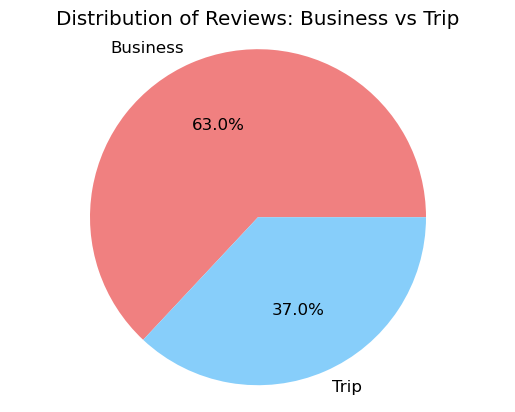

In [57]:
business_keywords = ["business", "work", "meeting"]
trip_keywords = ["vacation", "holiday", "family trip"]

df['business_count'] = df['lemmas'].apply(lambda x: sum(1 for keyword in business_keywords if keyword in x))
df['trip_count'] = df['lemmas'].apply(lambda x: sum(1 for keyword in trip_keywords if keyword in x))

# Calculate percentages
total_reviews = len(df)
business_per = (df['business_count'].sum() / total_reviews) * 100
trip_per = (df['trip_count'].sum() / total_reviews) * 100

labels = ['Business', 'Trip']
sizes = [business_per,trip_per]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%0.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Distribution of Reviews: Business vs Trip')


> We see that majority of people tend to book the hotel for business purposes.

# Vadar Sentiment Analysis
**VADER** stands for Valence Aware Dictionary and sentiment Reasoner. It is a rule-based sentiment analyzer.It consists of a list of lexical features (e.g. words) which are generally labeled as per their semantic orientation as positive or negative.

In [58]:
data=df.copy()
data.drop(columns={'Review','Clean_Reviews','stemmed'},inplace=True)

In [59]:
data.sample(3)

lemmas  business_count  \
18039  good breakfast clean nice people fourth floren...               0   
18219  great deal decent husband stayed aqua palm spa...               0   
19349  best overall business traveller regular busine...               1   

       trip_count  
18039           0  
18219           0  
19349           0

In [60]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [61]:
# analyser = SentimentIntensityAnalyzer()

In [62]:
import nltk
nltk.download('vader_lexicon')

def sentiment_score(text):
    analyser = SentimentIntensityAnalyzer()
    sentiment_scores = analyser.polarity_scores(text)
    score=sentiment_scores['compound']

    if score>=0.5:
        return "Positive"
    elif -0.5 <= score <= 0.5:
        return "Neutral"
    else:
        return "Negative"

data['sentiment'] = data['lemmas'].apply(sentiment_score)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [63]:
data.head(5)

lemmas  business_count  \
0  nice expensive parking got good deal stay anni...               0   
1  ok nothing special charge diamond member hilto...               1   
2  nice room not experience monaco seattle good n...               1   
3  unique great stay wonderful time monaco locati...               1   
4  great stay great stay went seahawk game awesom...               1   

   trip_count sentiment  
0           0  Positive  
1           0  Positive  
2           0  Positive  
3           0  Positive  
4           0  Positive

In [64]:
positive_sentiment_count = (data['sentiment'] == 'Positive').sum()
negative_sentiment_count = (data['sentiment'] == 'Negative').sum()
neutral_sentiment_count = (data['sentiment'] == 'Neutral').sum()
print(f"Number of Positive Sentiments: {positive_sentiment_count}")
print(f"Number of Negative Sentiments: {negative_sentiment_count}")
print(f"Number of Neutral Sentiments: {neutral_sentiment_count}")

Number of Positive Sentiments: 18535
Number of Negative Sentiments: 985
Number of Neutral Sentiments: 971


In [65]:
dt=pd.DataFrame({'lemmas':data.lemmas,'rating':reviews.Rating})
dt.head()

lemmas  rating
0  nice expensive parking got good deal stay anni...       4
1  ok nothing special charge diamond member hilto...       2
2  nice room not experience monaco seattle good n...       3
3  unique great stay wonderful time monaco locati...       5
4  great stay great stay went seahawk game awesom...       5

In [66]:
dt['sentiment']=dt['rating'].map({4:'positive',5:'positive',
                                 3:'neutral',
                                 2:'negative',1:'negative'})
dt.sample(3)

lemmas  rating sentiment
18586  weddingmoon majestic stayed majestic january m...       5  positive
10996  not worth trouble say money good thing quiet i...       1  negative
19768  great breakfast great location darkish facing ...       4  positive

In [67]:
dt['sentiment'].value_counts()

positive    15093
negative     3214
neutral      2184
Name: sentiment, dtype: int64

In [68]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

my_stop_words = stopwords.words('english')
sw_list = ['\x92','rt','ye','yeah','haha','Yes','__Ç_éÈe','I','__Ç','__Ç_é_',"br/", "hotel", "room"]     # index 1044 emojis
my_stop_words.extend(sw_list)

# Separate data based on sentiment
positive_reviews = dt[dt['sentiment'] == 'positive']['lemmas']
negative_reviews = dt[dt['sentiment'] == 'negative']['lemmas']

# Generate WordCloud for positive reviews
wordcloud_positive = WordCloud(width=1000,height=400,background_color='black',max_words=500,stopwords=my_stop_words).generate(' '.join(positive_reviews))

# Generate WordCloud for negative reviews
wordcloud_negative = WordCloud(width=1000,height=400,background_color='black',max_words=500,stopwords=my_stop_words).generate(' '.join(negative_reviews))


#### Positive word Extraction

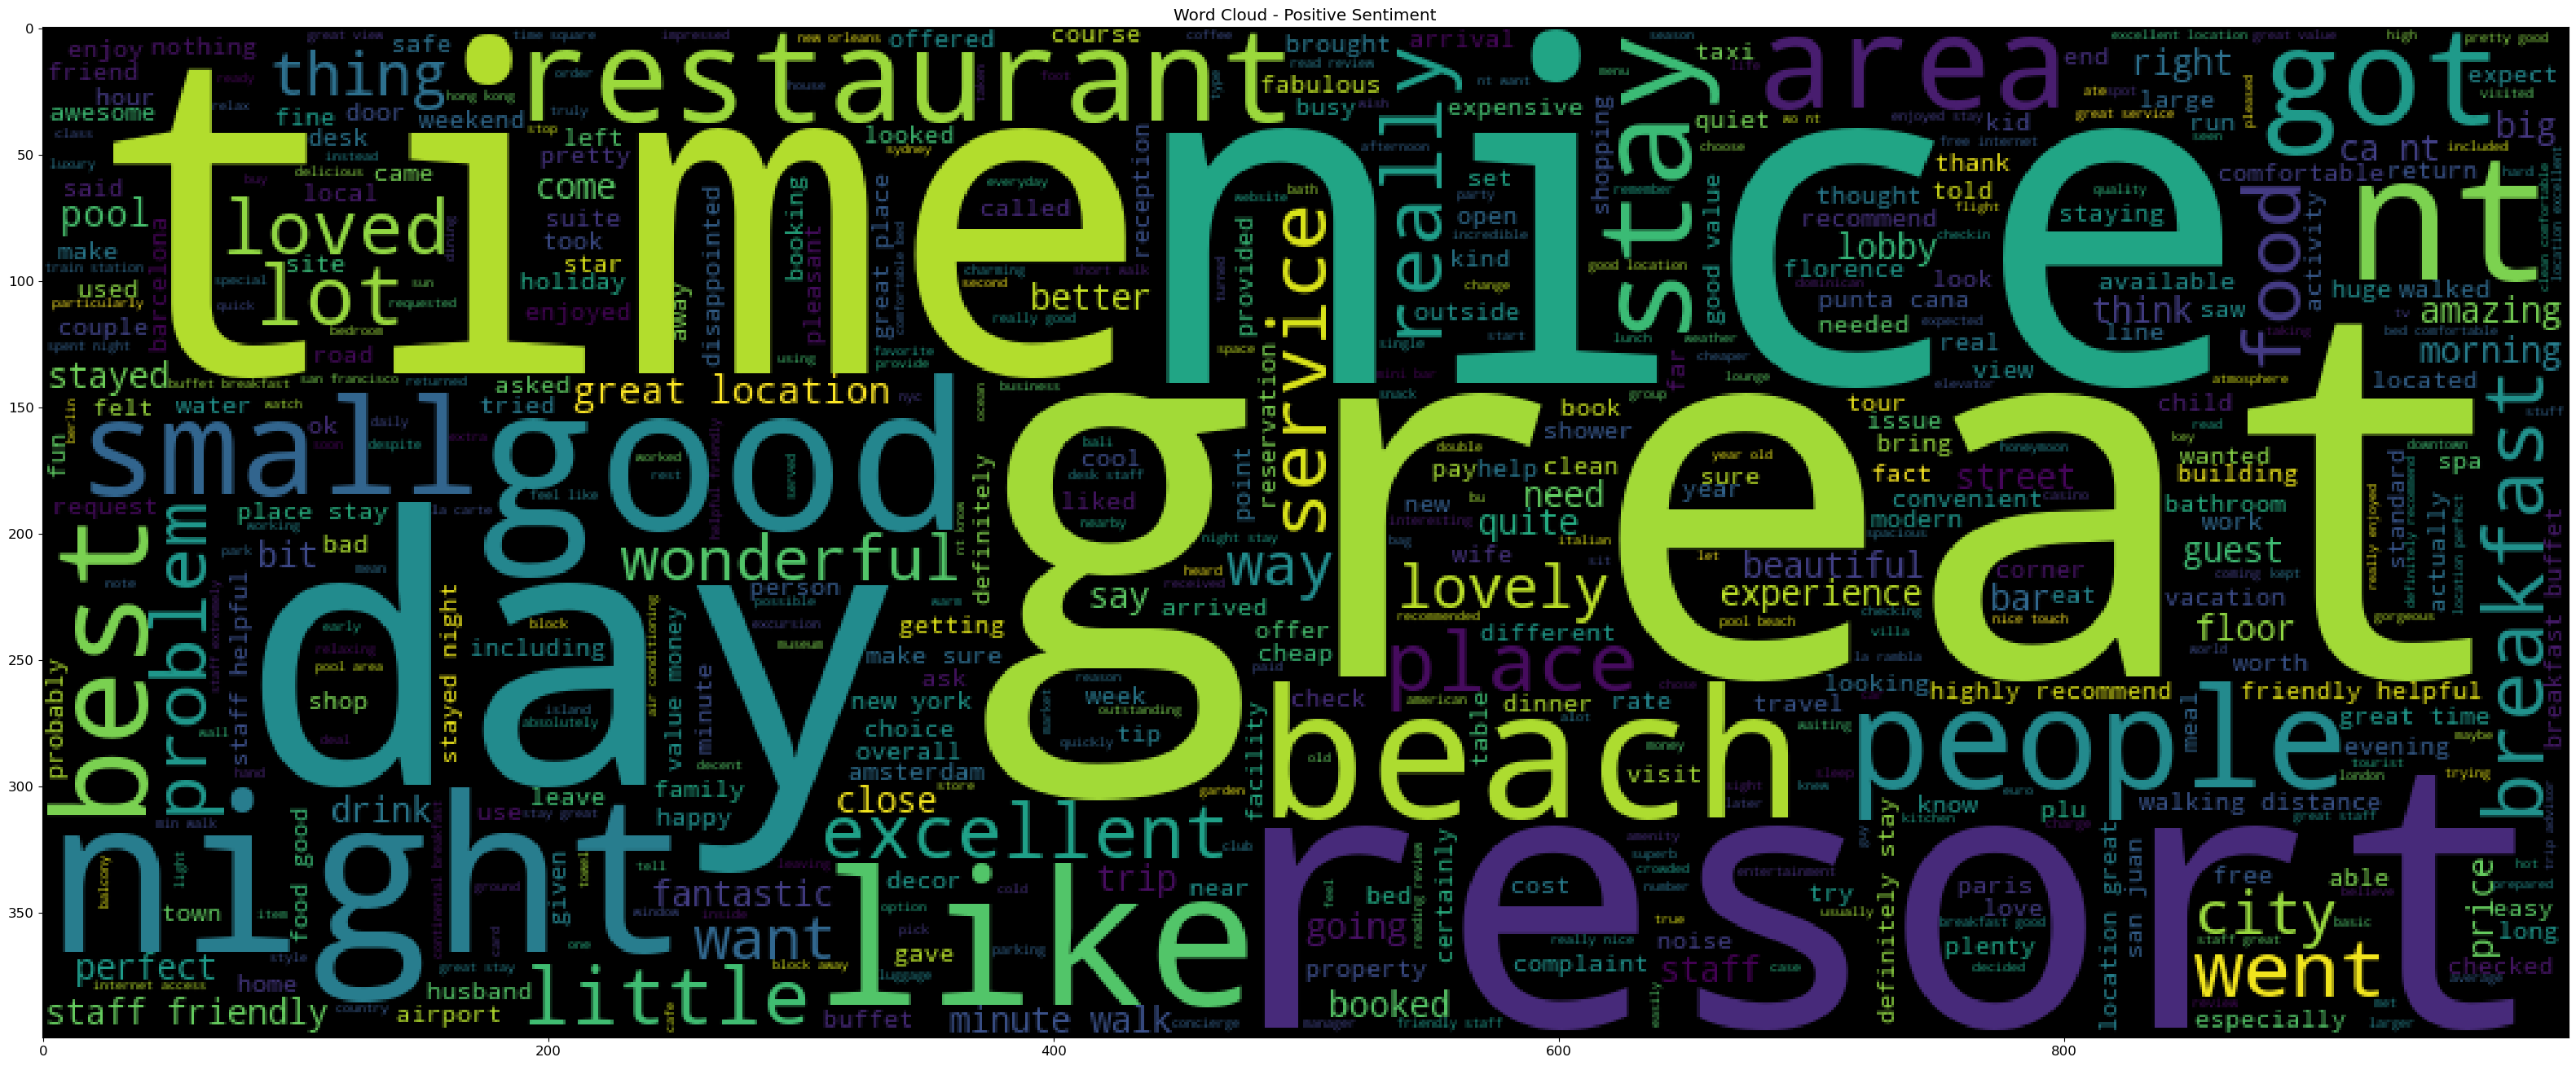

In [69]:
# for positive sentiment
plt.figure(figsize=(40,30))
# plt.subplot(2,1,1)
plt.imshow(wordcloud_positive)
plt.title('Word Cloud - Positive Sentiment')
plt.show()

In [70]:
import nltk
nltk.download('vader_lexicon')

pos_words_for_pos_group = []
neg_words_for_pos_group = []

def classify_words(text):
    analyzer = SentimentIntensityAnalyzer()
    words = text.split()
    for word in words:
        score = analyzer.polarity_scores(word)['compound']
        if score > 0.5:
            pos_words_for_pos_group.append(word)
        elif score < -0.5:
            neg_words_for_pos_group.append(word)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [71]:
# words = clean_reviews.split()
# positive_words = classify_words(words)
# print(pos_words[:10])
# print(neg_words[:10])

# pos_group = dt[(dt["rating"]==5) & (dt["sentiment"]=="positive")]
# print(len(pos_group))
# pos_group["lemmas"].apply(classify_words)

pos_group = dt[(dt["rating"] == 5) & (dt["sentiment"] == "positive")]
print(len(pos_group))
pos_group["lemmas"].apply(lambda x: classify_words(x))

9054


3        None
4        None
5        None
6        None
8        None
         ... 
20473    None
20476    None
20480    None
20482    None
20486    None
Name: lemmas, Length: 9054, dtype: object

In [72]:
from collections import Counter

# most common POSITIVE words used in positive reviews and positive ratings
word_counts = Counter(pos_words_for_pos_group)
most_common_positive_words_in_pos_reviews = word_counts.most_common(20)
print("most common top_10 positive words used in positive reviews and positive ratings are :","\n",most_common_positive_words_in_pos_reviews[:10])

print("*****"*10)

# most common NEGATIVE words used in postive reviews and positive ratings
word_counts = Counter(neg_words_for_pos_group)
most_common_negative_words_in_pos_reviews = word_counts.most_common(20)
print("most common top_10 negative words used in positive reviews and positive ratings are :","\n",most_common_negative_words_in_pos_reviews[:10])

most common top_10 positive words used in positive reviews and positive ratings are : 
 [('great', 10668), ('excellent', 3680), ('best', 3100), ('wonderful', 2720), ('beautiful', 2289), ('comfortable', 2184), ('loved', 2097), ('fantastic', 2035), ('perfect', 1901), ('free', 1846)]
**************************************************
most common top_10 negative words used in positive reviews and positive ratings are : 
 [('bad', 637), ('negative', 398), ('sick', 172), ('die', 91), ('disappointment', 57), ('worst', 50), ('horrible', 49), ('hate', 40), ('pain', 35), ('ruin', 35)]


#### Negative word extraction

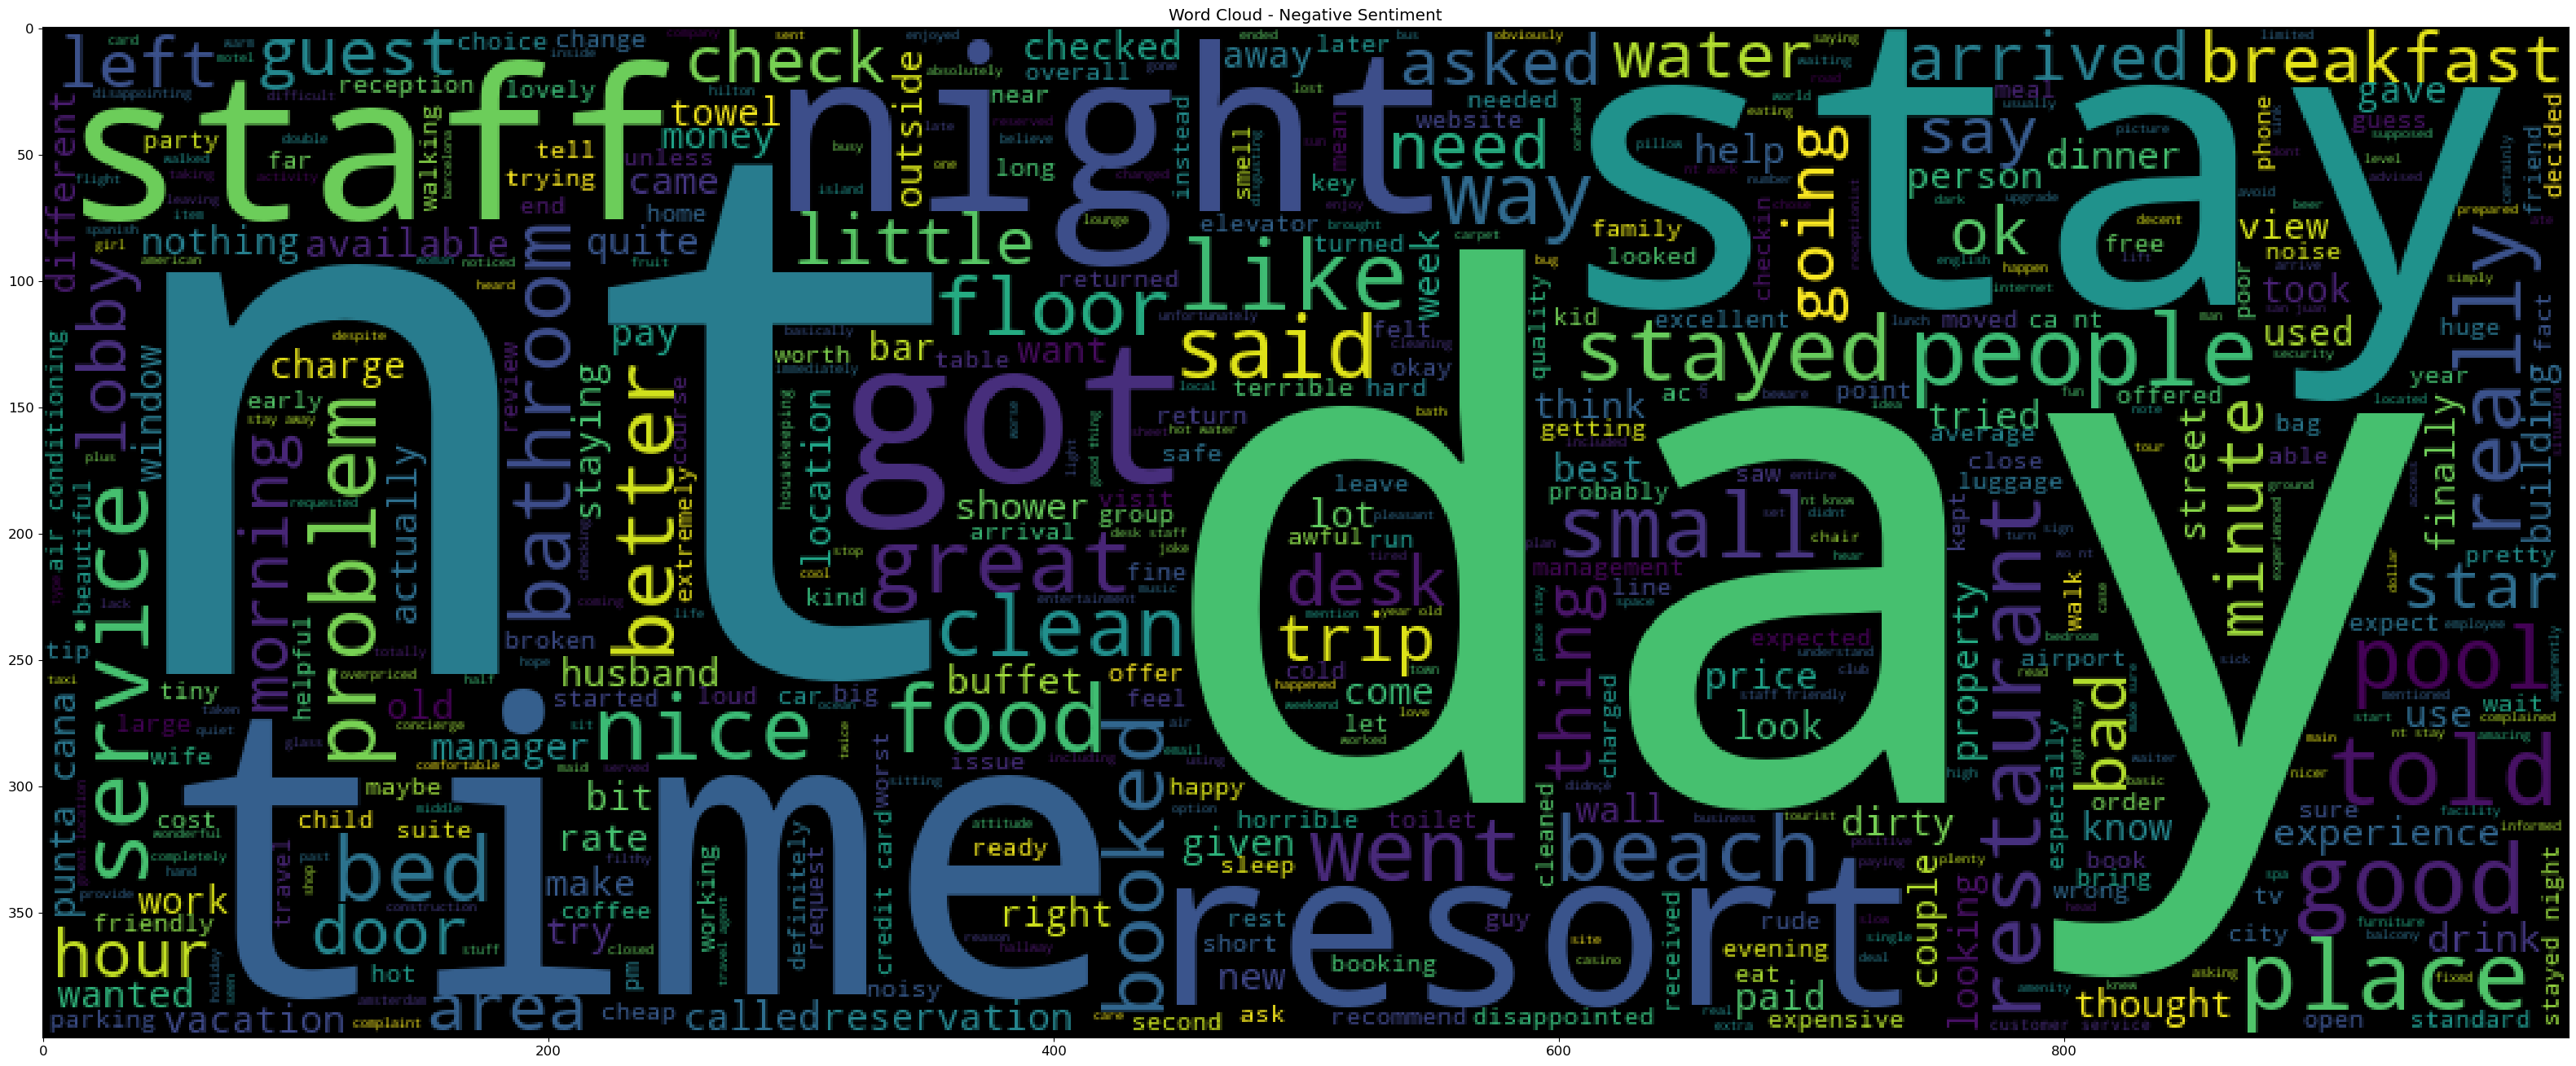

In [73]:
# for negative sentiment
plt.figure(figsize=(40,30))
# plt.subplot(2,1,2)
plt.imshow(wordcloud_negative)
plt.title('Word Cloud - Negative Sentiment')
plt.show()

In [74]:
import nltk
nltk.download('vader_lexicon')

pos_words_for_neg_group = []
neg_words_for_neg_group = []

def classify_words(text):
    analyzer = SentimentIntensityAnalyzer()
    words = text.split()
    for word in words:
        score = analyzer.polarity_scores(word)['compound']
        if score > 0.5:
            pos_words_for_neg_group.append(word)
        elif score < -0.5:
            neg_words_for_neg_group.append(word)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [121]:
neg_group = dt[(dt["rating"]==1) & (dt["sentiment"]=="negative")]
print(len(neg_group))
neg_group["lemmas"].apply(classify_words)

1421


15                   ([free, kind], [horrible, disgusted])
32                                                ([], [])
40                  ([pleasant, honored, pleasant], [bad])
65                       ([], [hated, horrible, horrible])
69                                                ([], [])
                               ...                        
20421                            ([great], [worst, worst])
20460                          ([beautiful, gorgeous], [])
20465                     ([beautiful], [worst, disaster])
20467                                        ([], [worst])
20489    ([happy, best, precious, beautiful, heartfelt,...
Name: lemmas, Length: 1421, dtype: object

In [122]:
from collections import Counter

# most common POSITIVE words used in negative reviews and negative ratings
word_counts = Counter(pos_words_for_neg_group)
most_common_positive_words_in_neg_reviews = word_counts.most_common(20)
print("most common top_10 positive words used in negative reviews and negative ratings are :","\n",most_common_positive_words_in_neg_reviews[:10])

print("*****"*10)

# most common NEGATIVE words used in postive reviews and positive ratings
word_counts = Counter(neg_words_for_neg_group)
most_common_negative_words_in_neg_reviews = word_counts.most_common(20)
print("most common top_10 negative words used in negative reviews and negative ratings are :","\n",most_common_negative_words_in_neg_reviews[:10])

most common top_10 positive words used in negative reviews and negative ratings are : 
 [('great', 10668), ('excellent', 3680), ('best', 3100), ('wonderful', 2720), ('beautiful', 2289), ('comfortable', 2184), ('loved', 2097), ('fantastic', 2035), ('perfect', 1901), ('free', 1846)]
**************************************************
most common top_10 negative words used in negative reviews and negative ratings are : 
 [('bad', 637), ('negative', 398), ('sick', 172), ('die', 91), ('disappointment', 57), ('worst', 50), ('horrible', 49), ('hate', 40), ('pain', 35), ('ruin', 35)]


# Count Vectorizer

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()
senti=cv.fit_transform(dt.lemmas)
feature_names=cv.get_feature_names_out()
print(feature_names[100:200])

['aboutif' 'aboutit' 'aboutkeep' 'aboutlastly' 'aboutmaid' 'aboutmy'
 'aboutour' 'aboutplease' 'aboutpros' 'aboutrestaurant' 'aboutso'
 'abouttaxi' 'aboutthe' 'aboutthere' 'aboutthis' 'aboutwas' 'aboutwe'
 'aboutwhen' 'aboutwithin' 'aboveaverage' 'aboveavg' 'abovebelow'
 'abovecheckin' 'aboveevening' 'abovefinnally' 'aboveground' 'abovehotel'
 'abovementioned' 'abovepar' 'abovethe' 'abraham' 'abrahan' 'abrasion'
 'abrasive' 'abreast' 'abroad' 'abrupt' 'abruptly' 'abruptness' 'abruzzo'
 'absaloutly' 'absence' 'absencewould' 'absense' 'absent' 'absentee'
 'absentminded' 'absentmindedly' 'absentwhen' 'absofreakinlutely'
 'absoloutely' 'absolubt' 'absoluetly' 'absolultely' 'absolulty' 'absolut'
 'absolutaley' 'absolutaly' 'absolutbacardi' 'absolute' 'absoluteall'
 'absoluteley' 'absolutely' 'absolutelyloved' 'absolutey' 'absolutley'
 'absolutly' 'absorb' 'absorbant' 'absorbed' 'absorber' 'absorbing'
 'absorption' 'absortion' 'absouloutly' 'absoulte' 'absoultely'
 'absoultley' 'absoultly' '

In [78]:
print(cv.vocabulary_)

{'nice': 41434, 'expensive': 22298, 'parking': 45170, 'got': 27060, 'good': 26843, 'deal': 16295, 'stay': 59243, 'anniversary': 2577, 'arrived': 3701, 'late': 34932, 'evening': 21549, 'took': 63741, 'advice': 932, 'previous': 48204, 'review': 52347, 'valet': 67027, 'check': 11406, 'quick': 49477, 'easy': 19698, 'little': 35904, 'disappointed': 17855, 'nonexistent': 42057, 'view': 67535, 'clean': 12329, 'size': 56717, 'bed': 6360, 'comfortable': 13220, 'woke': 69936, 'stiff': 59523, 'neck': 41053, 'high': 29307, 'pillow': 46456, 'not': 42274, 'soundproof': 57918, 'like': 35638, 'heard': 28751, 'music': 40609, 'night': 41599, 'morning': 40068, 'loud': 36533, 'bang': 5278, 'door': 18706, 'opening': 43570, 'closing': 12632, 'hear': 28748, 'people': 45781, 'talking': 61409, 'hallway': 28182, 'maybe': 38139, 'noisy': 41951, 'neighbor': 41206, 'aveda': 4511, 'bath': 5775, 'product': 48651, 'goldfish': 26798, 'touch': 63949, 'taken': 61372, 'advantage': 882, 'staying': 59297, 'longer': 36366, 

In [79]:
print(senti.toarray()[100:400])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [80]:
print(senti.toarray()[:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [81]:
print(senti.toarray()[1980:1986, 1000:1100])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 

In [82]:
dt.lemmas[162]

'nice small bathroom stayed night returned night leaving seattle king size actually large bathroom small time sink tiny second time toiletry overall clean nice bed flatscreen tv road noise street parking night privilege good location'

In [83]:
senti[162].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [84]:
import numpy as np
np.set_printoptions(threshold=np.inf)

In [85]:
print(senti[0].toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

# TF-IDF

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [87]:
vectorizer=TfidfVectorizer(max_features=1000,max_df=0.5,smooth_idf=True)
doc_vec=vectorizer.fit_transform(dt.lemmas)
names_features=vectorizer.get_feature_names_out()
dense=doc_vec.todense()
denselist=dense.tolist()
df_=pd.DataFrame(denselist,columns=names_features)

In [88]:
df_

able  absolutely        ac  access  accommodation  activity  actually  \
0       0.0    0.000000  0.000000     0.0            0.0  0.000000   0.00000   
1       0.0    0.000000  0.000000     0.0            0.0  0.000000   0.00000   
2       0.0    0.000000  0.093338     0.0            0.0  0.000000   0.00000   
3       0.0    0.000000  0.000000     0.0            0.0  0.000000   0.00000   
4       0.0    0.000000  0.000000     0.0            0.0  0.083383   0.00000   
...     ...         ...       ...     ...            ...       ...       ...   
20486   0.0    0.000000  0.000000     0.0            0.0  0.000000   0.00000   
20487   0.0    0.000000  0.000000     0.0            0.0  0.000000   0.00000   
20488   0.0    0.000000  0.000000     0.0            0.0  0.000000   0.00000   
20489   0.0    0.063131  0.000000     0.0            0.0  0.000000   0.03189   
20490   0.0    0.000000  0.000000     0.0            0.0  0.000000   0.00000   

            add  added  additional  ...  worry  worse  worst  worth  write  \
0      0.000000    0.0         0.0  ...    0.0    0.0    0.0    0.0    0.0   
1      0.000000    0.0         0.0  ...    0.0    0.0    0.0    0.0    0.0   
2      0.000000    0.0         0.0  ...    0.0    0.0    0.0    0.0    0.0   
3      0.000000    0.0         0.0  ...    0.0    0.0    0.0    0.0    0.0   
4      0.000000    0.0         0.0  ...    0.0    0.0    0.0    0.0    0.0   
...         ...    ...         ...  ...    ...    ...    ...    ...    ...   
20486  0.000000    0.0         0.0  ...    0.0    0.0    0.0    0.0    0.0   
20487  0.000000    0.0         0.0  ...    0.0    0.0    0.0    0.0    0.0   
20488  0.000000    0.0         0.0  ...    0.0    0.0    0.0    0.0    0.0   
20489  0.042686    0.0         0.0  ...    0.0    0.0    0.0    0.0    0.0   
20490  0.000000    0.0         0.0  ...    0.0    0.0    0.0    0.0    0.0   

          wrong      year       yes  york     young  
0      0.000000  0.000000  0.000000   0.0  0.000000  
1      0.000000  0.000000  0.000000   0.0  0.000000  
2      0.000000  0.000000  0.000000   0.0  0.000000  
3      0.000000  0.000000  0.000000   0.0  0.000000  
4      0.000000  0.000000  0.000000   0.0  0.000000  
...         ...       ...       ...   ...       ...  
20486  0.000000  0.000000  0.000000   0.0  0.000000  
20487  0.000000  0.000000  0.000000   0.0  0.000000  
20488  0.000000  0.000000  0.000000   0.0  0.000000  
20489  0.000000  0.079757  0.000000   0.0  0.038508  
20490  0.130063  0.000000  0.238771   0.0  0.000000  

[20491 rows x 1000 columns]

# Word2Vec

In [89]:
# Word2Vec
import gensim
from gensim.utils import simple_preprocess

In [90]:
story = []
for i in dt["lemmas"]:
  story.append(simple_preprocess(i))

In [91]:
print(len(story))   # in story there are 20491 sentences and every sentences are tokenize

story

20491


[['nice',
  'expensive',
  'parking',
  'got',
  'good',
  'deal',
  'stay',
  'anniversary',
  'arrived',
  'late',
  'evening',
  'took',
  'advice',
  'previous',
  'review',
  'valet',
  'parking',
  'check',
  'quick',
  'easy',
  'little',
  'disappointed',
  'nonexistent',
  'view',
  'clean',
  'nice',
  'size',
  'bed',
  'comfortable',
  'woke',
  'stiff',
  'neck',
  'high',
  'pillow',
  'not',
  'soundproof',
  'like',
  'heard',
  'music',
  'night',
  'morning',
  'loud',
  'bang',
  'door',
  'opening',
  'closing',
  'hear',
  'people',
  'talking',
  'hallway',
  'maybe',
  'noisy',
  'neighbor',
  'aveda',
  'bath',
  'product',
  'nice',
  'not',
  'goldfish',
  'stay',
  'nice',
  'touch',
  'taken',
  'advantage',
  'staying',
  'longer',
  'location',
  'great',
  'walking',
  'distance',
  'shopping',
  'overall',
  'nice',
  'experience',
  'pay',
  'parking',
  'night'],
 ['ok',
  'nothing',
  'special',
  'charge',
  'diamond',
  'member',
  'hilton',
  'deci

In [92]:
model = gensim.models.Word2Vec(
    story,
    window = 10,                # it means when we predict the centre word how much words will we keep on other side
    min_count = 2,             # we will take only those words min count is more than or equal to 2
    vector_size = 100,         # how many vec are needed in output
)

In [93]:
model.build_vocab(story)

In [94]:
model.train(story, total_examples=model.corpus_count, epochs=10)

(17436460, 19506800)

In [95]:
model.wv.get_normed_vectors().shape

(26416, 100)

In [96]:
model.wv.most_similar("dirty")

[('disgusting', 0.8080048561096191),
 ('stained', 0.765845775604248),
 ('carpet', 0.7263845801353455),
 ('stain', 0.7210294604301453),
 ('filthy', 0.7200343608856201),
 ('smelly', 0.7169718742370605),
 ('cracked', 0.7143111228942871),
 ('gross', 0.709814727306366),
 ('worn', 0.6993972659111023),
 ('badly', 0.6779752373695374)]

In [97]:
model.wv.most_similar("wonderful")

[('fabulous', 0.7554128766059875),
 ('terrific', 0.6812853217124939),
 ('incredible', 0.6483777761459351),
 ('amazing', 0.6439155340194702),
 ('fantastic', 0.6406117677688599),
 ('great', 0.6337793469429016),
 ('perfect', 0.5948297381401062),
 ('awesome', 0.5939667820930481),
 ('delightful', 0.586737871170044),
 ('loved', 0.5858921408653259)]

In [98]:
model.wv.most_similar("room")

[('bathroom', 0.6057133078575134),
 ('deluxe', 0.5891888737678528),
 ('bed', 0.5585493445396423),
 ('twin', 0.543607234954834),
 ('allocated', 0.5384256839752197),
 ('standard', 0.5284525156021118),
 ('roomthe', 0.5121288299560547),
 ('superior', 0.49806684255599976),
 ('balcony', 0.48183077573776245),
 ('bigger', 0.48079511523246765)]

In [99]:
# people travelling for a busiess
model.wv.most_similar(positive=["business"])

[('convention', 0.592668354511261),
 ('leisure', 0.5632209181785583),
 ('frequent', 0.5623138546943665),
 ('conference', 0.5446226000785828),
 ('financial', 0.540013313293457),
 ('frolicking', 0.4723098874092102),
 ('tutu', 0.47077280282974243),
 ('wellness', 0.45365437865257263),
 ('meeting', 0.44611361622810364),
 ('dallas', 0.4301087558269501)]

In [100]:
# people for holidays
model.wv.most_similar(positive=["holiday", "travel","room"], negative=[], topn=10)

[('travelling', 0.493367999792099),
 ('thomson', 0.44782817363739014),
 ('originally', 0.4307996928691864),
 ('deluxe', 0.4178368151187897),
 ('accomodations', 0.40833404660224915),
 ('normal', 0.3957839608192444),
 ('excited', 0.39489734172821045),
 ('particulalrly', 0.3938373029232025),
 ('twin', 0.39369282126426697),
 ('undoubtably', 0.38839542865753174)]

In [101]:
model.wv.most_similar(positive=["room", "dirty", "disappoint", "suffered", "noise", "unsanitary"], negative=[], topn=10)

[('stain', 0.6887058019638062),
 ('littered', 0.6800907254219055),
 ('torn', 0.6602144837379456),
 ('disgusting', 0.659285843372345),
 ('filthy', 0.6589604616165161),
 ('smelly', 0.6563435792922974),
 ('cracked', 0.6504263877868652),
 ('dust', 0.643334150314331),
 ('badly', 0.6425876021385193),
 ('damp', 0.6390908360481262)]

In [102]:
model.wv.most_similar(positive=["frontdesk","employee", "polite", "cooperative"], negative=[], topn=10)

[('gentleman', 0.6753475666046143),
 ('personnel', 0.6371798515319824),
 ('greeting', 0.6242221593856812),
 ('courteous', 0.6222010850906372),
 ('genuinely', 0.6159788370132446),
 ('eager', 0.6126516461372375),
 ('smiled', 0.6113465428352356),
 ('smile', 0.6082108616828918),
 ('hardworking', 0.607837975025177),
 ('arrogant', 0.6062286496162415)]

In [103]:
a = model.wv.get_vector("employee") + model.wv.get_vector("polite") + model.wv.get_vector("cooperative")
model.wv.cosine_similarities(a, [model.wv.get_vector("frontdesk")])

array([0.23004617], dtype=float32)

In [104]:
model.wv.most_similar(positive=["valuable","stole","belonging","purse","lost"], negative=[], topn=10)

[('stolen', 0.8872374892234802),
 ('wallet', 0.8253833651542664),
 ('passport', 0.817474365234375),
 ('theft', 0.7105602025985718),
 ('thief', 0.697067141532898),
 ('handbag', 0.6711147427558899),
 ('locked', 0.6693136692047119),
 ('security', 0.6582695841789246),
 ('belt', 0.6577798128128052),
 ('theives', 0.6570801138877869)]

In [105]:
model.wv.most_similar(positive=["valuable","stole","belonging","purse",], negative=["lost"], topn=10)

[('stolen', 0.789882242679596),
 ('wallet', 0.7260193228721619),
 ('passport', 0.7128264307975769),
 ('thief', 0.6877124905586243),
 ('handbag', 0.6862761378288269),
 ('theft', 0.6406279802322388),
 ('security', 0.63985675573349),
 ('locked', 0.6369580030441284),
 ('belt', 0.6177375912666321),
 ('sunglass', 0.6135031580924988)]

In [106]:
model.wv.most_similar(positive=["disgusting","service","customer","horrible"], negative=[], topn=10)

[('terrible', 0.7397187948226929),
 ('awful', 0.6899076104164124),
 ('inconsistent', 0.648571252822876),
 ('lousy', 0.640519380569458),
 ('worst', 0.6045527458190918),
 ('poor', 0.6005657315254211),
 ('worse', 0.5851721167564392),
 ('mediocre', 0.5725971460342407),
 ('unsanitary', 0.5673717260360718),
 ('dirty', 0.5653243064880371)]

In [107]:
b = model.wv.get_vector("horrible") + model.wv.get_vector("customer") + model.wv.get_vector("service")
model.wv.cosine_similarities(b, [model.wv.get_vector("management")])

array([0.56392735], dtype=float32)

In [108]:
model.wv.similarity("parking", "lost")

0.040055357

In [109]:
model.wv.similarity("clean", "room")

0.48032486

In [110]:
model.wv.get_normed_vectors().shape #26415 unique words

(26416, 100)

In [117]:
#model.wv.get_normed_vectors()
y=model.wv.index_to_key
# y

In [112]:
from sklearn.decomposition import PCA

In [113]:
pca=PCA(n_components=3)

In [114]:
p=pca.fit_transform(model.wv.get_normed_vectors())
p.shape

(26416, 3)

In [118]:
import plotly.express as px
fig=px.scatter_3d(p[:100],x=0,y=1,z=2,color=y[:100])

In [119]:
fig.show()